<a href="https://colab.research.google.com/github/Vlxn761/redshift-fotometrico/blob/main/Red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Montaje


En sección se realiza todo el montaje previo al entrenamiento de los modelos. Particularmente, cargar la base de datos, definir variables y separar datos en entrenamiento, validación y testeo.

In [ ]:
pip install mpl-scatter-density

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time
import pandas as pd
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path_archivo ='/content/drive/MyDrive/Tareas Módulo/Proyecto redshift fotométrico/Redshift.csv'
data = pd.read_csv(path_archivo, skiprows=[0])

In [ ]:
datos = data[['redshift', 'u', 'g', 'r', 'i', 'z']]

In [ ]:
training, validacion = train_test_split(datos, test_size=.2)    # 80% para entrenamiento y testeo, 20% para validación
x = training[['u', 'g', 'r', 'i', 'z']]
y = training['redshift']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)    # 75% para entrenamiento, 25% para testeo

## Primer modelo

In [ ]:
# Un modelo simple de 1 neurona
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(5,)),
    tf.keras.layers.Dense(units=1),
], name='model1'
)

model1.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
t0 = time.time()
hist1 = model1.fit(x_train, y_train, epochs=50, batch_size=512, verbose=2, validation_split=0.25)
trainning_time_model1 = time.time() - t0

Epoch 1/50
440/440 - 3s - 6ms/step - loss: 88.6316 - val_loss: 0.9284
Epoch 2/50
440/440 - 1s - 2ms/step - loss: 0.7065 - val_loss: 0.6854
Epoch 3/50
440/440 - 1s - 3ms/step - loss: 0.6811 - val_loss: 0.6784
Epoch 4/50
440/440 - 1s - 2ms/step - loss: 0.6730 - val_loss: 0.6692
Epoch 5/50
440/440 - 1s - 2ms/step - loss: 0.6625 - val_loss: 0.6573
Epoch 6/50
440/440 - 1s - 2ms/step - loss: 0.6493 - val_loss: 0.6424
Epoch 7/50
440/440 - 1s - 3ms/step - loss: 0.6328 - val_loss: 0.6241
Epoch 8/50
440/440 - 3s - 7ms/step - loss: 0.6127 - val_loss: 0.6019
Epoch 9/50
440/440 - 4s - 8ms/step - loss: 0.5884 - val_loss: 0.5751
Epoch 10/50
440/440 - 2s - 4ms/step - loss: 0.5596 - val_loss: 0.5437
Epoch 11/50
440/440 - 1s - 3ms/step - loss: 0.5257 - val_loss: 0.5070
Epoch 12/50
440/440 - 1s - 3ms/step - loss: 0.4867 - val_loss: 0.4653
Epoch 13/50
440/440 - 1s - 3ms/step - loss: 0.4428 - val_loss: 0.4188
Epoch 14/50
440/440 - 1s - 3ms/step - loss: 0.3945 - val_loss: 0.3682
Epoch 15/50
440/440 - 2s - 4

In [ ]:
model1_loss = model1.evaluate(x_test, y_test, verbose=0)

print(f"Model 1 loss: {model1_loss}")

Model 1 loss: 0.01441587321460247


In [ ]:
model1.save("/content/drive/MyDrive/Tareas Módulo/Proyecto redshift fotométrico/ Modelo1.keras")

## Modelo 2

In [ ]:
# Modelo con 3 capas de 10 neuronas cada una
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(5,)),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="linear")
], name='model2')

model2.summary()

Model: "model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer="adam", loss='mean_squared_error')

In [ ]:
t0 = time.time()

hist2 = model2.fit(x_train, y_train, epochs=40, batch_size=256, verbose=2, validation_split=0.25)
trainning_time_model2 = time.time() - t0

Epoch 1/40
879/879 - 6s - 6ms/step - loss: 0.0751 - val_loss: 0.0125
Epoch 2/40
879/879 - 4s - 5ms/step - loss: 0.0100 - val_loss: 0.0085
Epoch 3/40
879/879 - 2s - 2ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 4/40
879/879 - 2s - 2ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 5/40
879/879 - 3s - 4ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 6/40
879/879 - 6s - 7ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 7/40
879/879 - 2s - 2ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 8/40
879/879 - 2s - 2ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 9/40
879/879 - 2s - 2ms/step - loss: 0.0059 - val_loss: 0.0065
Epoch 10/40
879/879 - 3s - 3ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 11/40
879/879 - 3s - 3ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 12/40
879/879 - 3s - 3ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 13/40
879/879 - 4s - 5ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 14/40
879/879 - 2s - 2ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 15/40
879/879 - 2s - 2m

In [ ]:
model2_loss = model2.evaluate(x_test, y_test, verbose=0)

print(f"Model 2 loss: {model2_loss}")

Model 2 loss: 0.004982221871614456


In [ ]:
model2.save("/content/drive/MyDrive/Tareas Módulo/Proyecto redshift fotométrico/ Modelo2.keras")

## Gráficos y validación

In [ ]:
x_validacion, z_real = validacion[['u', 'g', 'r', 'i', 'z']], validacion['redshift']
z_real = z_real.to_numpy()

In [ ]:
z_predict_1 = model1.predict(x_validacion, verbose=0)
z_predict_1 = np.array([x[0] for x in z_predict_1])

z_predict_2 = model2.predict(x_validacion, verbose=0)
z_predict_2 = np.array([x[0] for x in z_predict_2])

In [ ]:
def errorAbsoluto(real, pred):
    return abs(real - pred)

error_abs_1 = errorAbsoluto(z_real, z_predict_1)
error_abs_2 = errorAbsoluto(z_real, z_predict_2)

In [ ]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)


def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Puntos por píxel')

/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


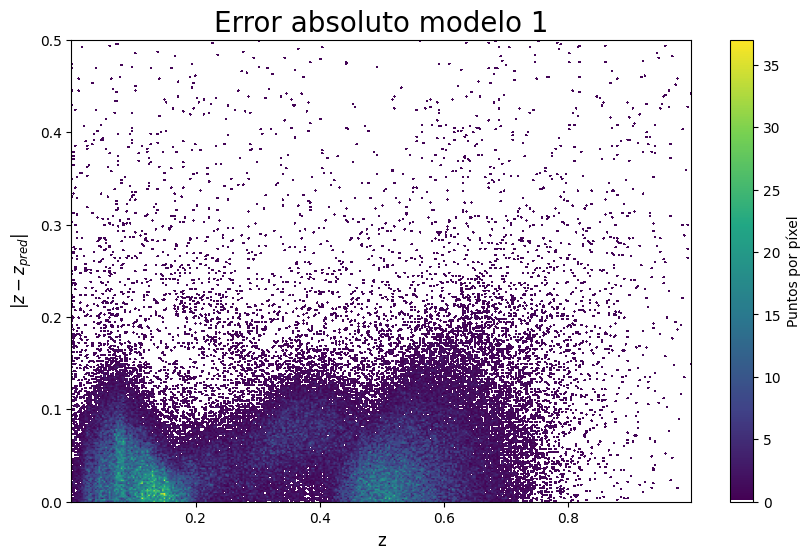

In [ ]:
fig = plt.figure(figsize=(10, 6))
using_mpl_scatter_density(fig, z_real, error_abs_1)
plt.xlabel("z", fontsize=12)
plt.ylabel(r'$|z-z_{pred}|$', fontsize=12)
plt.ylim(0,0.5)
plt.title("Error absoluto modelo 1", fontsize=20)
plt.show()

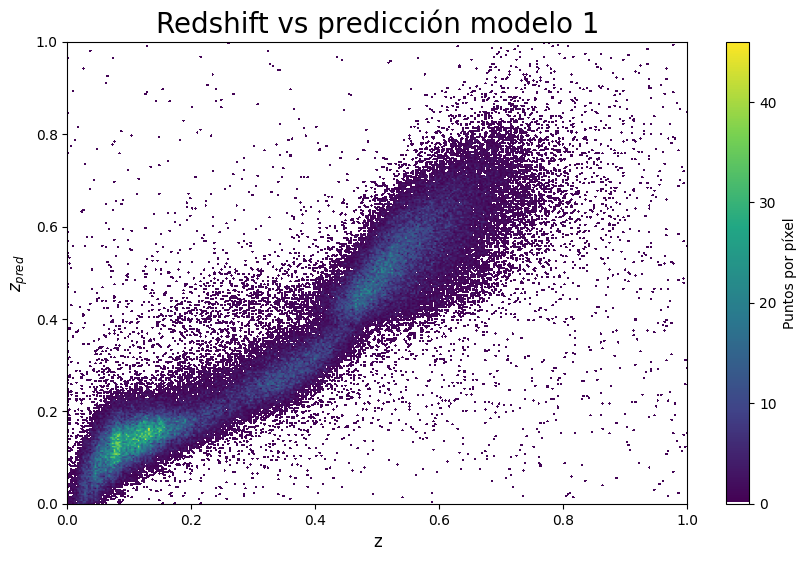

In [ ]:
fig = plt.figure(figsize=(10, 6))
using_mpl_scatter_density(fig, z_real, z_predict_1)
plt.xlabel("z", fontsize=12)
plt.ylabel(r'$z_{pred}$', fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Redshift vs predicción modelo 1", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


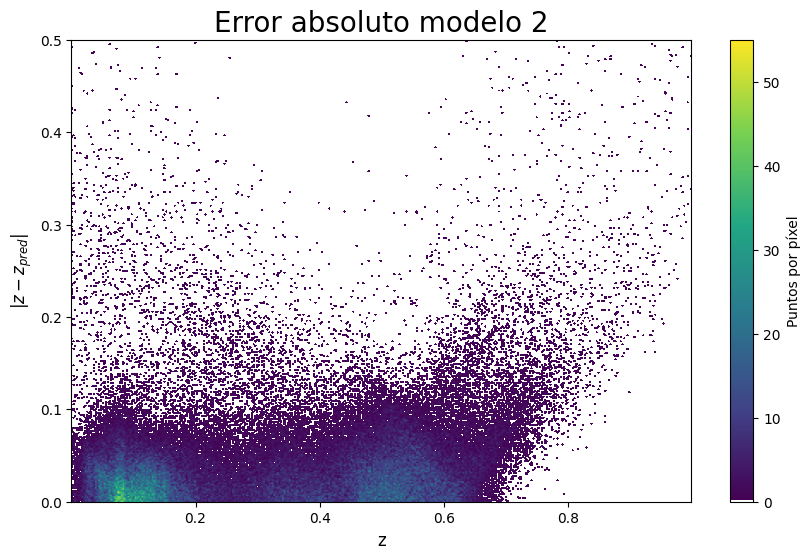

In [ ]:
fig = plt.figure(figsize=(10, 6))
using_mpl_scatter_density(fig, z_real, error_abs_2)
plt.xlabel("z", fontsize=12)
plt.ylabel(r'$|z-z_{pred}|$', fontsize=12)
plt.ylim(0,0.5)
plt.title("Error absoluto modelo 2", fontsize=20)
plt.show()

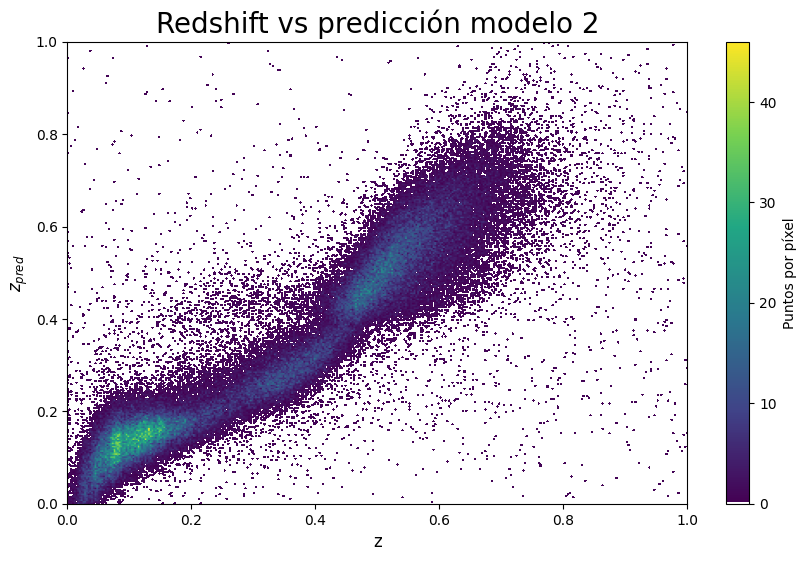

In [ ]:
fig = plt.figure(figsize=(10, 6))
using_mpl_scatter_density(fig, z_real, z_predict_1)
plt.xlabel("z", fontsize=12)
plt.ylabel(r'$z_{pred}$', fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Redshift vs predicción modelo 2", fontsize=20)
plt.show()

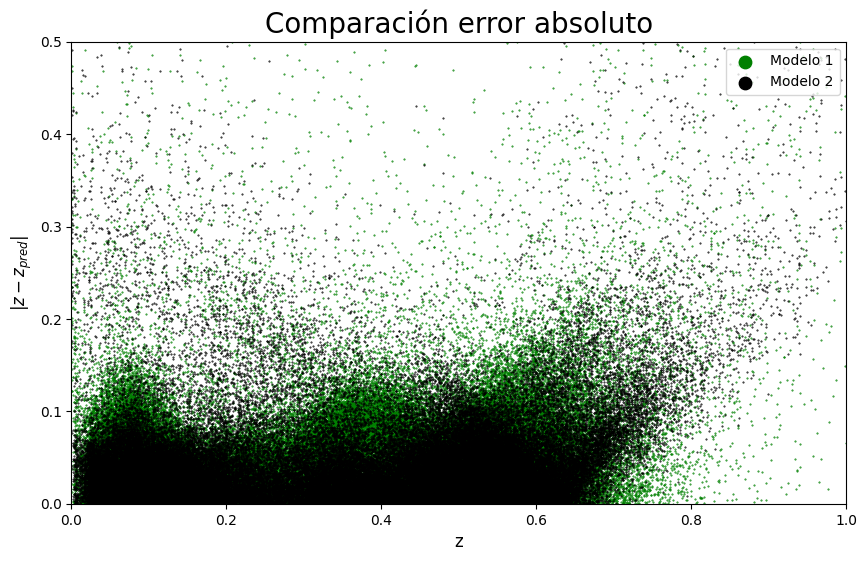

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(z_real, error_abs_1, s=0.2, c="green", label="Modelo 1")
plt.scatter(z_real, error_abs_2, s=0.2, c="black", label="Modelo 2")
plt.xlabel("z", fontsize=12)
plt.ylabel(r'$|z-z_{pred}|$', fontsize=12)
plt.xlim(0,1)
plt.ylim(0,0.5)
plt.legend(loc="upper right", markerscale=20)
plt.title("Comparación error absoluto", fontsize=20)
plt.show()

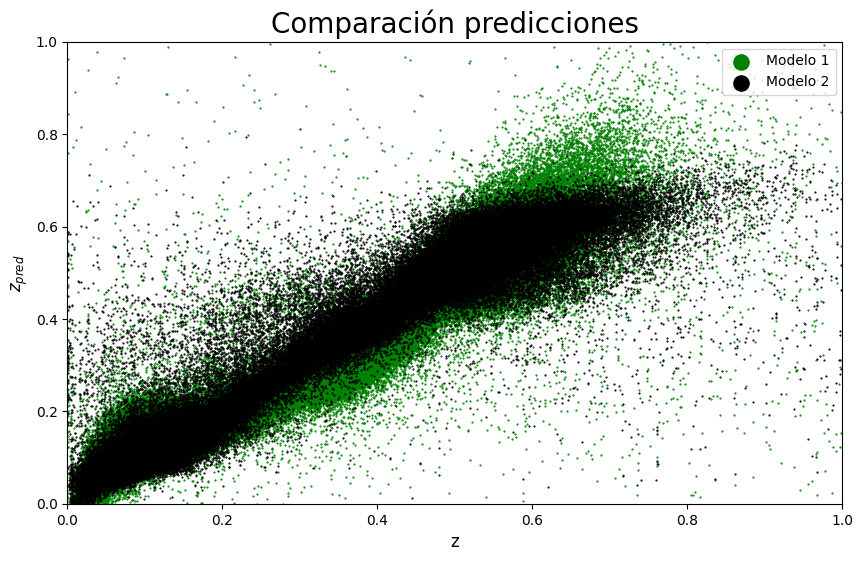

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(z_real, z_predict_1, s=0.3, c="green", label="Modelo 1")
plt.scatter(z_real, z_predict_2, s=0.3, c="black", label="Modelo 2")
plt.xlabel("z", fontsize=12)
plt.ylabel(r'$z_{pred}$', fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc="upper right", markerscale=20)
plt.title("Comparación predicciones", fontsize=20)
plt.show()